the first part is tring to find some birds that there migration trends may have relationship with climates.


Bird types:
1. Long-distance migratory birds: Canada goose NABBP_2023_grp_02.csv

2. short-distance migratory birds: Red-winged Blackbird NABBP_2023_grp_48.csv

3. wetland bird for precipitation and humidity study: mallard NABBP_2023_grp_08.csv

4. land bird for whether study: American Goldfinch NABBP_2023_grp_39.csv

5. possible related to extreme whether: Branta geese including CAGO subspecies, Swans NABBP_2023_grp_03.csv(hail)
Wood Duck NABBP_2023_grp_04.csv (tornado, damage winds, freezing drizzle)

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
## 1. Canada goose:long-distance

In [ ]:
bird_csv_path = './NABBP_2023_grp_02.csv'
cols = ['EVENT_YEAR', 'EVENT_MONTH', 'ISO_COUNTRY', 'ISO_SUBDIVISION','LAT_DD','LON_DD']
df = pd.read_csv(bird_csv_path, usecols = cols)

print("Columns (label):", df.columns.tolist())
print(df.head())
print(f"Total rows: {df.shape[0]}, Total columns: {df.shape[1]}")


C:\Users\aaa\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Columns (label): ['EVENT_MONTH', 'EVENT_YEAR', 'ISO_COUNTRY', 'ISO_SUBDIVISION', 'LAT_DD', 'LON_DD']
   EVENT_MONTH  EVENT_YEAR ISO_COUNTRY ISO_SUBDIVISION LAT_DD  LON_DD
0            7        1960          CA           CA-AB   50.5  -112.5
1            7        1960          CA           CA-AB   50.5  -112.5
2            7        1960          CA           CA-AB   50.5  -112.5
3            7        1960          CA           CA-AB   50.5  -112.5
4            7        1960          CA           CA-AB   50.5  -112.5
Total rows: 5085264, Total columns: 6


In [18]:
print(df['EVENT_MONTH'].unique())

[ 7  9 10  6  8 11  5  4  3 12  1  2 99 94 82 83 93 92]


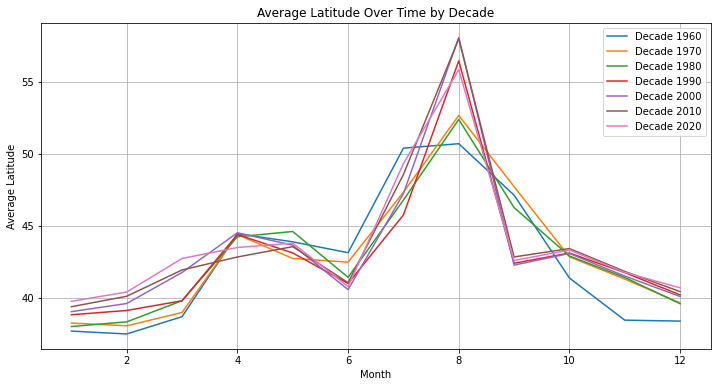

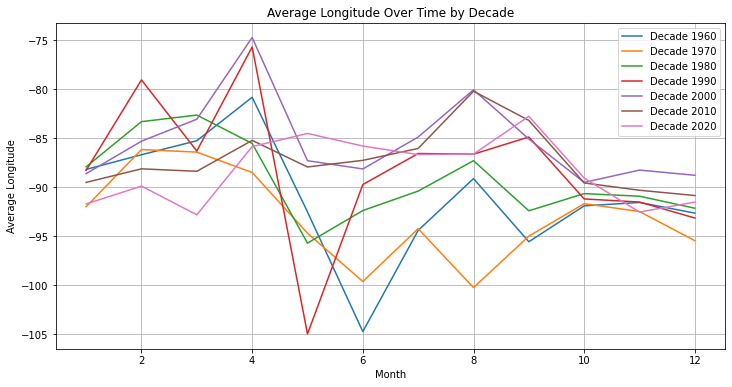

In [22]:
df['LAT_DD'] = pd.to_numeric(df['LAT_DD'], errors='coerce')
df['LON_DD'] = pd.to_numeric(df['LON_DD'], errors='coerce')

df['EVENT_YEAR'] = pd.to_numeric(df['EVENT_YEAR'], errors='coerce')
df.dropna(subset=['EVENT_YEAR'], inplace=True)  
df['EVENT_YEAR'] = df['EVENT_YEAR'].astype(int)

df['EVENT_MONTH'] = pd.to_numeric(df['EVENT_MONTH'], errors='coerce')
df = df[(df['EVENT_MONTH'] >= 1) & (df['EVENT_MONTH'] <= 12)]
df['EVENT_MONTH'] = df['EVENT_MONTH'].astype(int)

df['DECADE'] = (df['EVENT_YEAR'] // 10) * 10

monthly_lat_data = df.groupby(['DECADE', 'EVENT_MONTH'])['LAT_DD'].mean().reset_index()
monthly_lon_data = df.groupby(['DECADE', 'EVENT_MONTH'])['LON_DD'].mean().reset_index()

plt.figure(figsize=(12, 6))
for decade in monthly_lat_data['DECADE'].unique():
    subset = monthly_lat_data[monthly_lat_data['DECADE'] == decade]
    plt.plot(subset['EVENT_MONTH'], subset['LAT_DD'], label=f"Decade {decade}")

plt.title('Average Latitude Over Time by Decade')
plt.xlabel('Month')
plt.ylabel('Average Latitude')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
for decade in monthly_lon_data['DECADE'].unique():
    subset = monthly_lon_data[monthly_lon_data['DECADE'] == decade]
    plt.plot(subset['EVENT_MONTH'], subset['LON_DD'], label=f"Decade {decade}")

plt.title('Average Longitude Over Time by Decade')
plt.xlabel('Month')
plt.ylabel('Average Longitude')
plt.legend()
plt.grid(True)
plt.show()

we can see from this dataset that Canada goose migrates north in the summer and back after summer(possible related to temperature), 
migrates west betwwen spring(I guess for food).

with decade trande we can see that before 2000, the migration to west is obvious while after 2000, there is nearly no migration from east to west(we may find some possible relations with climate change).

In [ ]:
## 2. short-distance migratory birds: Red-winged Blackbird NABBP_2023_grp_48.csv

In [23]:
bird_csv_path = './NABBP_2023_grp_48.csv'
cols = ['EVENT_YEAR', 'EVENT_MONTH', 'ISO_COUNTRY', 'ISO_SUBDIVISION','LAT_DD','LON_DD']
df = pd.read_csv(bird_csv_path, usecols = cols)

print("Columns (label):", df.columns.tolist())
print(df.head())
print(f"Total rows: {df.shape[0]}, Total columns: {df.shape[1]}")

Columns (label): ['EVENT_MONTH', 'EVENT_YEAR', 'ISO_COUNTRY', 'ISO_SUBDIVISION', 'LAT_DD', 'LON_DD']
   EVENT_MONTH  EVENT_YEAR ISO_COUNTRY ISO_SUBDIVISION    LAT_DD     LON_DD
0            3        1962          BS             NaN  25.08333  -77.41667
1            3        1963          MX             NaN  30.75000 -110.91667
2            3        1963          MX             NaN  30.75000 -110.91667
3            4        1963          BS             NaN  25.08333  -77.58333
4            4        1963          MX             NaN  18.58333  -95.58333
Total rows: 845271, Total columns: 6


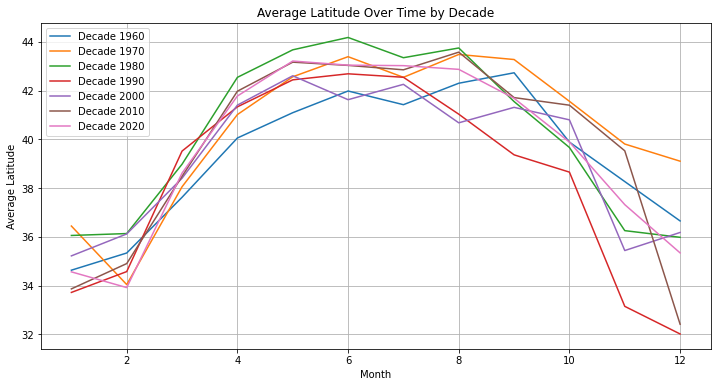

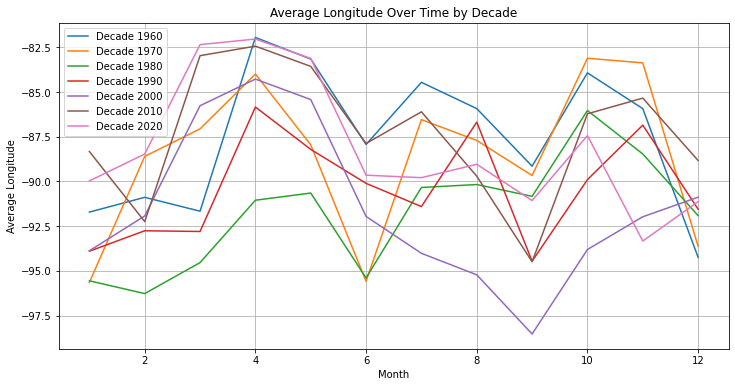

In [24]:
df['LAT_DD'] = pd.to_numeric(df['LAT_DD'], errors='coerce')
df['LON_DD'] = pd.to_numeric(df['LON_DD'], errors='coerce')

df['EVENT_YEAR'] = pd.to_numeric(df['EVENT_YEAR'], errors='coerce')
df.dropna(subset=['EVENT_YEAR'], inplace=True)  
df['EVENT_YEAR'] = df['EVENT_YEAR'].astype(int)

df['EVENT_MONTH'] = pd.to_numeric(df['EVENT_MONTH'], errors='coerce')
df = df[(df['EVENT_MONTH'] >= 1) & (df['EVENT_MONTH'] <= 12)]
df['EVENT_MONTH'] = df['EVENT_MONTH'].astype(int)

df['DECADE'] = (df['EVENT_YEAR'] // 10) * 10

monthly_lat_data = df.groupby(['DECADE', 'EVENT_MONTH'])['LAT_DD'].mean().reset_index()
monthly_lon_data = df.groupby(['DECADE', 'EVENT_MONTH'])['LON_DD'].mean().reset_index()

plt.figure(figsize=(12, 6))
for decade in monthly_lat_data['DECADE'].unique():
    subset = monthly_lat_data[monthly_lat_data['DECADE'] == decade]
    plt.plot(subset['EVENT_MONTH'], subset['LAT_DD'], label=f"Decade {decade}")

plt.title('Average Latitude Over Time by Decade')
plt.xlabel('Month')
plt.ylabel('Average Latitude')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
for decade in monthly_lon_data['DECADE'].unique():
    subset = monthly_lon_data[monthly_lon_data['DECADE'] == decade]
    plt.plot(subset['EVENT_MONTH'], subset['LON_DD'], label=f"Decade {decade}")

plt.title('Average Longitude Over Time by Decade')
plt.xlabel('Month')
plt.ylabel('Average Longitude')
plt.legend()
plt.grid(True)
plt.show()

since Red-winged Blackbird belongs to short distance migaration type, we can clearly find that they migarates to south in winter
and not migarates too far on longitude.

In [ ]:
## 3. wetland bird for precipitation and humidity study: mallard NABBP_2023_grp_08.csv

In [25]:
bird_csv_path = './NABBP_2023_grp_08.csv'
cols = ['EVENT_YEAR', 'EVENT_MONTH', 'ISO_COUNTRY', 'ISO_SUBDIVISION','LAT_DD','LON_DD']
df = pd.read_csv(bird_csv_path, usecols = cols)

print("Columns (label):", df.columns.tolist())
print(df.head())
print(f"Total rows: {df.shape[0]}, Total columns: {df.shape[1]}")

Columns (label): ['EVENT_MONTH', 'EVENT_YEAR', 'ISO_COUNTRY', 'ISO_SUBDIVISION', 'LAT_DD', 'LON_DD']
   EVENT_MONTH  EVENT_YEAR ISO_COUNTRY ISO_SUBDIVISION  LAT_DD  LON_DD
0            5        1960          CA           CA-AB    50.5  -112.5
1            5        1960          CA           CA-AB    50.5  -112.5
2            5        1960          CA           CA-AB    50.5  -112.5
3            5        1960          CA           CA-AB    50.5  -112.5
4            5        1960          CA           CA-AB    50.5  -112.5
Total rows: 7720579, Total columns: 6


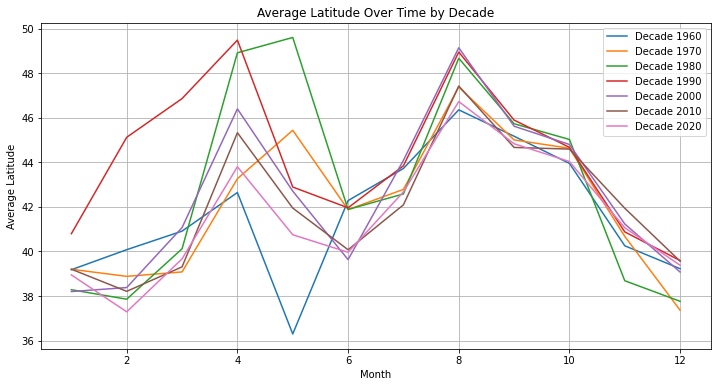

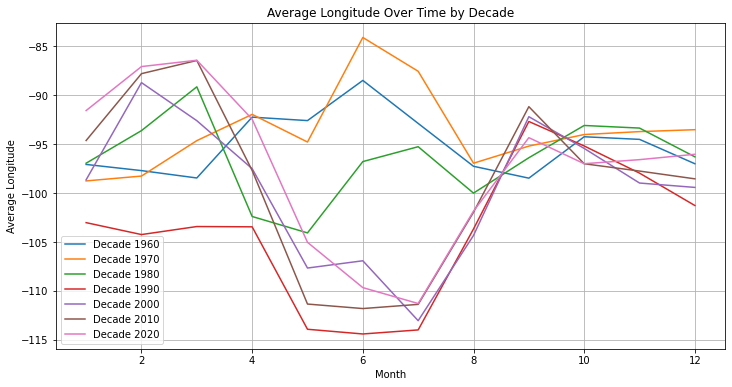

In [26]:
df['LAT_DD'] = pd.to_numeric(df['LAT_DD'], errors='coerce')
df['LON_DD'] = pd.to_numeric(df['LON_DD'], errors='coerce')

df['EVENT_YEAR'] = pd.to_numeric(df['EVENT_YEAR'], errors='coerce')
df.dropna(subset=['EVENT_YEAR'], inplace=True)  
df['EVENT_YEAR'] = df['EVENT_YEAR'].astype(int)

df['EVENT_MONTH'] = pd.to_numeric(df['EVENT_MONTH'], errors='coerce')
df = df[(df['EVENT_MONTH'] >= 1) & (df['EVENT_MONTH'] <= 12)]
df['EVENT_MONTH'] = df['EVENT_MONTH'].astype(int)

df['DECADE'] = (df['EVENT_YEAR'] // 10) * 10

monthly_lat_data = df.groupby(['DECADE', 'EVENT_MONTH'])['LAT_DD'].mean().reset_index()
monthly_lon_data = df.groupby(['DECADE', 'EVENT_MONTH'])['LON_DD'].mean().reset_index()

plt.figure(figsize=(12, 6))
for decade in monthly_lat_data['DECADE'].unique():
    subset = monthly_lat_data[monthly_lat_data['DECADE'] == decade]
    plt.plot(subset['EVENT_MONTH'], subset['LAT_DD'], label=f"Decade {decade}")

plt.title('Average Latitude Over Time by Decade')
plt.xlabel('Month')
plt.ylabel('Average Latitude')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
for decade in monthly_lon_data['DECADE'].unique():
    subset = monthly_lon_data[monthly_lon_data['DECADE'] == decade]
    plt.plot(subset['EVENT_MONTH'], subset['LON_DD'], label=f"Decade {decade}")

plt.title('Average Longitude Over Time by Decade')
plt.xlabel('Month')
plt.ylabel('Average Longitude')
plt.legend()
plt.grid(True)
plt.show()

i think there exists some change for the migaration trend this type of bird for longitude aspect. 
we can see that before 1990, the bird didn't show any trend to migrate to west in summer but they have an opposite performance in recent 30 years like migrating west around summer and back in autumn.
since this bird's activity may more related to humidity, we can discuss later.

In [ ]:
## 4. land bird for whether study: American Goldfinch NABBP_2023_grp_39.csv 

In [27]:
bird_csv_path = './NABBP_2023_grp_39.csv'
cols = ['EVENT_YEAR', 'EVENT_MONTH', 'ISO_COUNTRY', 'ISO_SUBDIVISION','LAT_DD','LON_DD']
df = pd.read_csv(bird_csv_path, usecols = cols)

print("Columns (label):", df.columns.tolist())
print(df.head())
print(f"Total rows: {df.shape[0]}, Total columns: {df.shape[1]}")

Columns (label): ['EVENT_MONTH', 'EVENT_YEAR', 'ISO_COUNTRY', 'ISO_SUBDIVISION', 'LAT_DD', 'LON_DD']
   EVENT_MONTH  EVENT_YEAR ISO_COUNTRY ISO_SUBDIVISION    LAT_DD  LON_DD
0            6        1964          CA           CA-AB  52.41667 -113.75
1            6        1964          CA           CA-AB  52.41667 -113.75
2            7        1965          CA           CA-AB  52.41667 -113.75
3            7        1965          CA           CA-AB  52.41667 -113.75
4            7        1965          CA           CA-AB  52.41667 -113.75
Total rows: 1629216, Total columns: 6


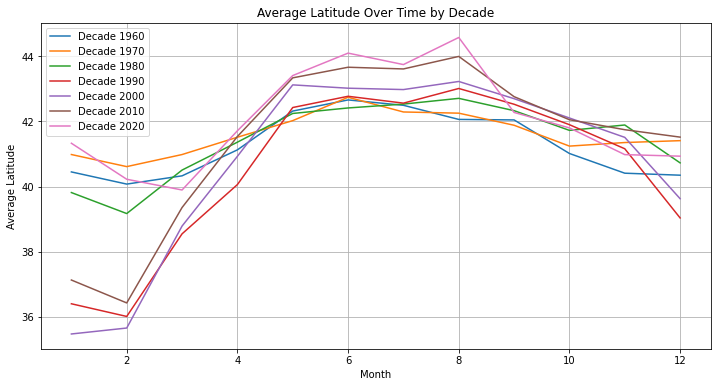

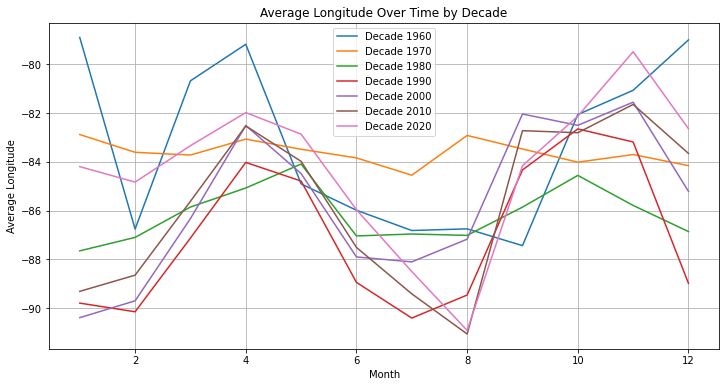

In [28]:
df['LAT_DD'] = pd.to_numeric(df['LAT_DD'], errors='coerce')
df['LON_DD'] = pd.to_numeric(df['LON_DD'], errors='coerce')

df['EVENT_YEAR'] = pd.to_numeric(df['EVENT_YEAR'], errors='coerce')
df.dropna(subset=['EVENT_YEAR'], inplace=True)  
df['EVENT_YEAR'] = df['EVENT_YEAR'].astype(int)

df['EVENT_MONTH'] = pd.to_numeric(df['EVENT_MONTH'], errors='coerce')
df = df[(df['EVENT_MONTH'] >= 1) & (df['EVENT_MONTH'] <= 12)]
df['EVENT_MONTH'] = df['EVENT_MONTH'].astype(int)

df['DECADE'] = (df['EVENT_YEAR'] // 10) * 10

monthly_lat_data = df.groupby(['DECADE', 'EVENT_MONTH'])['LAT_DD'].mean().reset_index()
monthly_lon_data = df.groupby(['DECADE', 'EVENT_MONTH'])['LON_DD'].mean().reset_index()

plt.figure(figsize=(12, 6))
for decade in monthly_lat_data['DECADE'].unique():
    subset = monthly_lat_data[monthly_lat_data['DECADE'] == decade]
    plt.plot(subset['EVENT_MONTH'], subset['LAT_DD'], label=f"Decade {decade}")

plt.title('Average Latitude Over Time by Decade')
plt.xlabel('Month')
plt.ylabel('Average Latitude')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
for decade in monthly_lon_data['DECADE'].unique():
    subset = monthly_lon_data[monthly_lon_data['DECADE'] == decade]
    plt.plot(subset['EVENT_MONTH'], subset['LON_DD'], label=f"Decade {decade}")

plt.title('Average Longitude Over Time by Decade')
plt.xlabel('Month')
plt.ylabel('Average Longitude')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
## 5. possible related to extereme weather

In [ ]:
## Swans NABBP_2023_grp_03.csv(hail)

In [29]:
bird_csv_path = './NABBP_2023_grp_03.csv'
cols = ['EVENT_YEAR', 'EVENT_MONTH', 'ISO_COUNTRY', 'ISO_SUBDIVISION','LAT_DD','LON_DD']
df = pd.read_csv(bird_csv_path, usecols = cols)

print("Columns (label):", df.columns.tolist())
print(df.head())
print(f"Total rows: {df.shape[0]}, Total columns: {df.shape[1]}")

Columns (label): ['EVENT_MONTH', 'EVENT_YEAR', 'ISO_COUNTRY', 'ISO_SUBDIVISION', 'LAT_DD', 'LON_DD']
   EVENT_MONTH  EVENT_YEAR ISO_COUNTRY ISO_SUBDIVISION    LAT_DD     LON_DD
0            8        2012          CA           CA-MB  58.73639  -94.15417
1            7        2008          CA           CA-NT  69.43000 -134.46722
2            7        2009          CA           CA-NT  70.06194 -130.36444
3            7        2010          CA           CA-NT  69.39250 -134.70306
4            7        2010          CA           CA-NT  69.39250 -134.70306
Total rows: 1292496, Total columns: 6


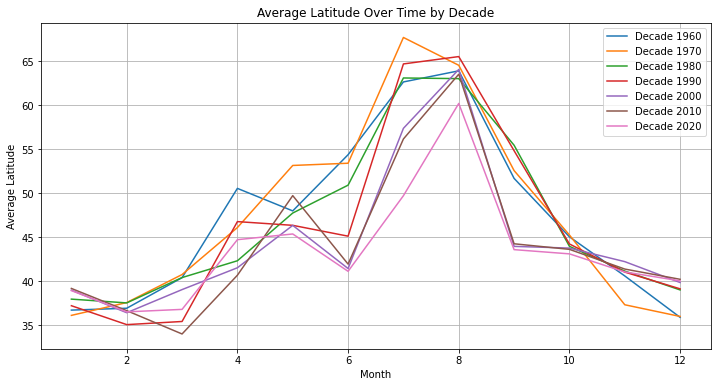

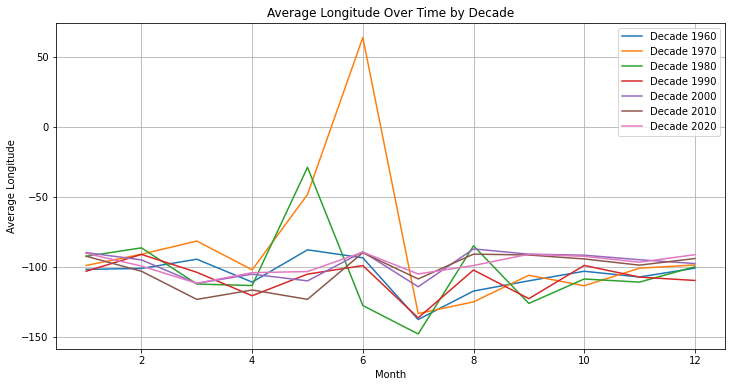

In [30]:
df['LAT_DD'] = pd.to_numeric(df['LAT_DD'], errors='coerce')
df['LON_DD'] = pd.to_numeric(df['LON_DD'], errors='coerce')

df['EVENT_YEAR'] = pd.to_numeric(df['EVENT_YEAR'], errors='coerce')
df.dropna(subset=['EVENT_YEAR'], inplace=True)  
df['EVENT_YEAR'] = df['EVENT_YEAR'].astype(int)

df['EVENT_MONTH'] = pd.to_numeric(df['EVENT_MONTH'], errors='coerce')
df = df[(df['EVENT_MONTH'] >= 1) & (df['EVENT_MONTH'] <= 12)]
df['EVENT_MONTH'] = df['EVENT_MONTH'].astype(int)

df['DECADE'] = (df['EVENT_YEAR'] // 10) * 10

monthly_lat_data = df.groupby(['DECADE', 'EVENT_MONTH'])['LAT_DD'].mean().reset_index()
monthly_lon_data = df.groupby(['DECADE', 'EVENT_MONTH'])['LON_DD'].mean().reset_index()

plt.figure(figsize=(12, 6))
for decade in monthly_lat_data['DECADE'].unique():
    subset = monthly_lat_data[monthly_lat_data['DECADE'] == decade]
    plt.plot(subset['EVENT_MONTH'], subset['LAT_DD'], label=f"Decade {decade}")

plt.title('Average Latitude Over Time by Decade')
plt.xlabel('Month')
plt.ylabel('Average Latitude')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
for decade in monthly_lon_data['DECADE'].unique():
    subset = monthly_lon_data[monthly_lon_data['DECADE'] == decade]
    plt.plot(subset['EVENT_MONTH'], subset['LON_DD'], label=f"Decade {decade}")

plt.title('Average Longitude Over Time by Decade')
plt.xlabel('Month')
plt.ylabel('Average Longitude')
plt.legend()
plt.grid(True)
plt.show()


we can see some change with longitude between 1970-1990 spring and summer gap, we might check what happened.

In [ ]:
## Wood Duck NABBP_2023_grp_04.csv (tornado, damage winds, freezing drizzle)

In [32]:
bird_csv_path = './NABBP_2023_grp_04.csv'
cols = ['EVENT_YEAR', 'EVENT_MONTH', 'ISO_COUNTRY', 'ISO_SUBDIVISION','LAT_DD','LON_DD']
df = pd.read_csv(bird_csv_path, usecols = cols)

print("Columns (label):", df.columns.tolist())
print(df.head())
print(f"Total rows: {df.shape[0]}, Total columns: {df.shape[1]}")

Columns (label): ['EVENT_MONTH', 'EVENT_YEAR', 'ISO_COUNTRY', 'ISO_SUBDIVISION', 'LAT_DD', 'LON_DD']
   EVENT_MONTH  EVENT_YEAR ISO_COUNTRY ISO_SUBDIVISION  LAT_DD  LON_DD
0          8.0      1974.0          CA           CA-AB    51.5  -111.5
1          8.0      1983.0          CA           CA-AB    53.5  -110.5
2          8.0      1983.0          CA           CA-AB    50.5  -112.5
3          8.0      1987.0          CA           CA-AB    49.5  -110.5
4          8.0      1988.0          CA           CA-AB    49.5  -110.5
Total rows: 1764604, Total columns: 6


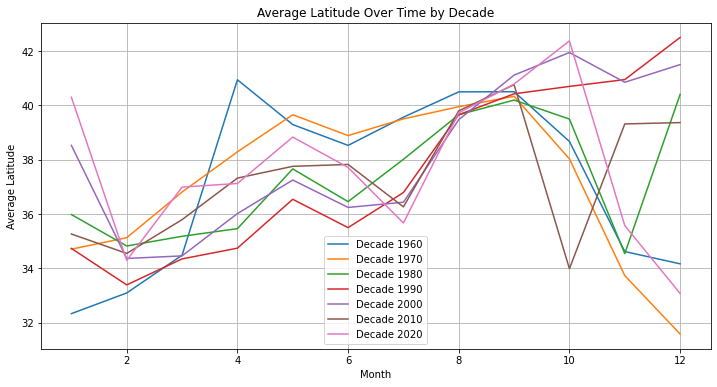

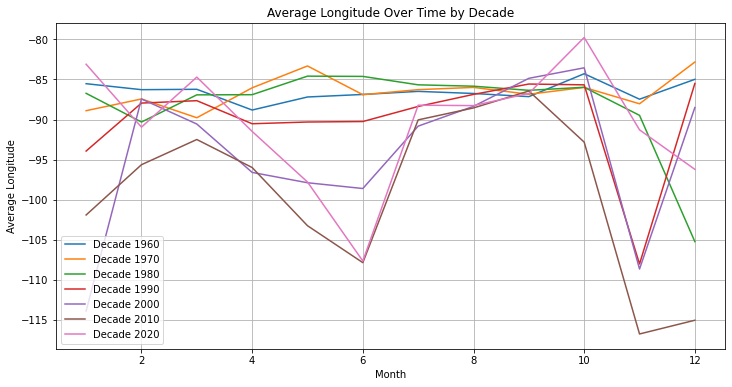

In [33]:
df['LAT_DD'] = pd.to_numeric(df['LAT_DD'], errors='coerce')
df['LON_DD'] = pd.to_numeric(df['LON_DD'], errors='coerce')

df['EVENT_YEAR'] = pd.to_numeric(df['EVENT_YEAR'], errors='coerce')
df.dropna(subset=['EVENT_YEAR'], inplace=True)  
df['EVENT_YEAR'] = df['EVENT_YEAR'].astype(int)

df['EVENT_MONTH'] = pd.to_numeric(df['EVENT_MONTH'], errors='coerce')
df = df[(df['EVENT_MONTH'] >= 1) & (df['EVENT_MONTH'] <= 12)]
df['EVENT_MONTH'] = df['EVENT_MONTH'].astype(int)

df['DECADE'] = (df['EVENT_YEAR'] // 10) * 10

monthly_lat_data = df.groupby(['DECADE', 'EVENT_MONTH'])['LAT_DD'].mean().reset_index()
monthly_lon_data = df.groupby(['DECADE', 'EVENT_MONTH'])['LON_DD'].mean().reset_index()

plt.figure(figsize=(12, 6))
for decade in monthly_lat_data['DECADE'].unique():
    subset = monthly_lat_data[monthly_lat_data['DECADE'] == decade]
    plt.plot(subset['EVENT_MONTH'], subset['LAT_DD'], label=f"Decade {decade}")

plt.title('Average Latitude Over Time by Decade')
plt.xlabel('Month')
plt.ylabel('Average Latitude')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
for decade in monthly_lon_data['DECADE'].unique():
    subset = monthly_lon_data[monthly_lon_data['DECADE'] == decade]
    plt.plot(subset['EVENT_MONTH'], subset['LON_DD'], label=f"Decade {decade}")

plt.title('Average Longitude Over Time by Decade')
plt.xlabel('Month')
plt.ylabel('Average Longitude')
plt.legend()
plt.grid(True)
plt.show()


the second part is trying to find whether the climate affects and what factors

for stations, we choose four to represent:
1. Grand Junction, Colorado (roughly -108.55 longitude, 39.07 latitude) 
Climate type: It is an arid continental climate with cold and dry winters and hot summers. Precipitation is low, but due to its mountainous proximity, strong thunderstorms and sudden winds can occur in summer. Winter also brings snow and cold weather.
Extreme weather: Dust storms, strong winds and freezing weather are possible, which can affect bird migration. Heavy snow and strong winds in winter, in particular, can cause birds to change their migration paths or stay times.

2. Sioux Falls, South Dakota (longitude ~ -96.72, latitude ~ 43.55)
Climate characteristics: Located in the north of central, belongs to the temperate continental climate. Summer is warm, winter is cold, more snow, occasionally tornadoes and other extreme weather.
Migration impacts: For birds along the migration path, extreme weather such as strong winds, snow, and freezing drizzle may affect the timing and route of their migration, especially for waterfowl and grassland birds.

3. Austin Camp, Texas (Longitude ~ -97.74, latitude ~ 30.26)
Climate characteristics: Located in central Texas, it belongs to the alternating zone of warm continental climate and subtropical climate. Summers are extremely hot and winters are mild. There are occasional storms and tropical storms.
Migration impacts: The region has a milder climate, but during tropical storm seasons and droughts, there can be impacts on bird feeding and habitat. we can study how wetland birds or birds on their way to migration respond to climate change.

4. Caribou Weather Forecast Office, Maine (Longitude ~ -67.99, latitude ~ 46.88)

Climate characteristics: Located in the northeast of the United States, it belongs to the cold climate. Winter is cold and snowfall, summer is cool. Climatic events such as freezing drizzle, strong winds and heavy snowfall are common.
Migration impacts: This region is challenging for migrating birds due to the cold climate and extreme weather events. Especially in early spring and late autumn, extreme weather may have important effects on the migration timing and route selection of birds.


Potential climatic factors:
1. temperature

2. Precipitation and humidity

3. wind

4. extreme climatic event: fog, hail, tornado, damage winds, freezing drizzle

Temperature (range for every month each decade)

C:\Users\aaa\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (17,19,21,23,25,27,29,31,33,35,37,39,41,43,45,47,49,51,53,55,57,59,61,63,65,67,69,71,73,75,77,79,81,83,85,87,89,91,93,95,97,99,101,103,105,107,109,111,113,115,117,119,121,123,125,127,129,131,133,135,137) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\aaa\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (17,19,21,23,25,27,29,31,33,35,37,39,41,43,45,47,49,51,53,55,57,59,61,63,65,67,69,71,73,75,77,79,81,83,85,87,89,91,95,111,113,115,117,119,121,123,125,127,129,131) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\aaa\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Colum

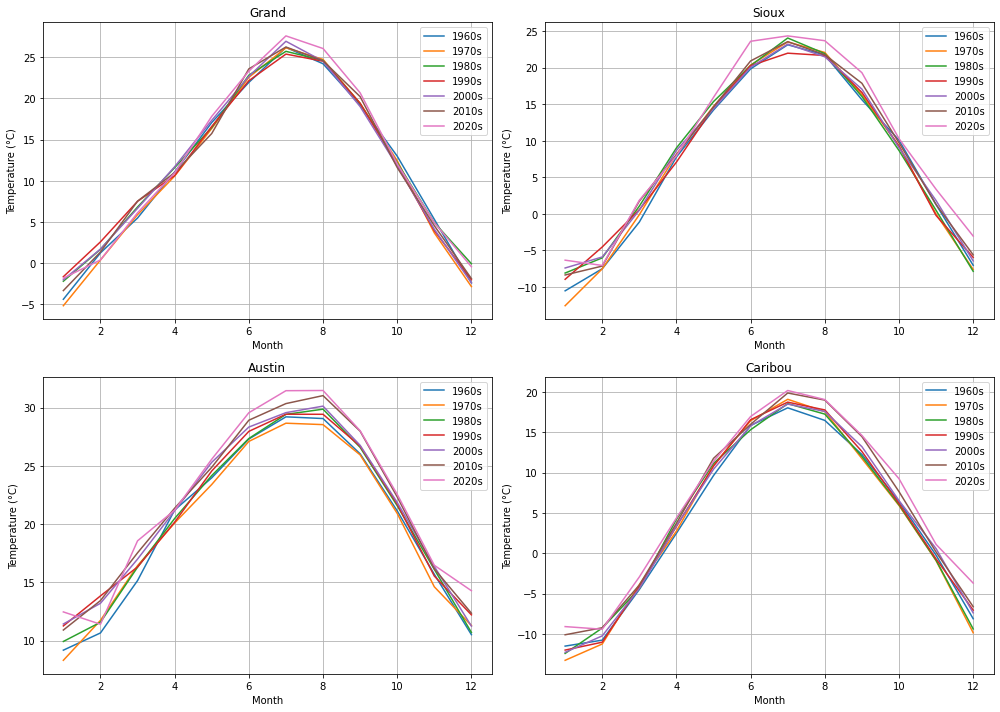

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

file_paths = ['./weather_data/grand.csv', './weather_data/sioux.csv', './weather_data/austin.csv', './weather_data/caribo.csv']  
station_names = ['Grand', 'Sioux', 'Austin', 'Caribou']  

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()  

for i, (file_path, station_name) in enumerate(zip(file_paths, station_names)):
    df = pd.read_csv(file_path)
    df['DATE'] = pd.to_datetime(df['DATE'])
    
    df['TEMPERATURE'] = (df['TMAX'] + df['TMIN']) / 20.0  
    
    df['YEAR'] = df['DATE'].dt.year
    df['MONTH'] = df['DATE'].dt.month

    df = df[(df['YEAR'] >= 1960) & (df['YEAR'] <= 2023)]
    df['DECADE'] = (df['YEAR'] // 10) * 10
    
    monthly_avg_temp = (
        df.groupby(['DECADE', 'MONTH'])['TEMPERATURE']
        .mean()
        .reset_index()
    )
    
    ax = axes[i]
    for decade in monthly_avg_temp['DECADE'].unique():
        subset = monthly_avg_temp[monthly_avg_temp['DECADE'] == decade]
        ax.plot(subset['MONTH'], subset['TEMPERATURE'], label=f"{decade}s")
    
    ax.set_title(station_name)
    ax.set_xlabel('Month')
    ax.set_ylabel('Temperature (°C)')
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()


Precipitation

C:\Users\aaa\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (17,19,21,23,25,27,29,31,33,35,37,39,41,43,45,47,49,51,53,55,57,59,61,63,65,67,69,71,73,75,77,79,81,83,85,87,89,91,93,95,97,99,101,103,105,107,109,111,113,115,117,119,121,123,125,127,129,131,133,135,137) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\aaa\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (17,19,21,23,25,27,29,31,33,35,37,39,41,43,45,47,49,51,53,55,57,59,61,63,65,67,69,71,73,75,77,79,81,83,85,87,89,91,95,111,113,115,117,119,121,123,125,127,129,131) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\aaa\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Colum

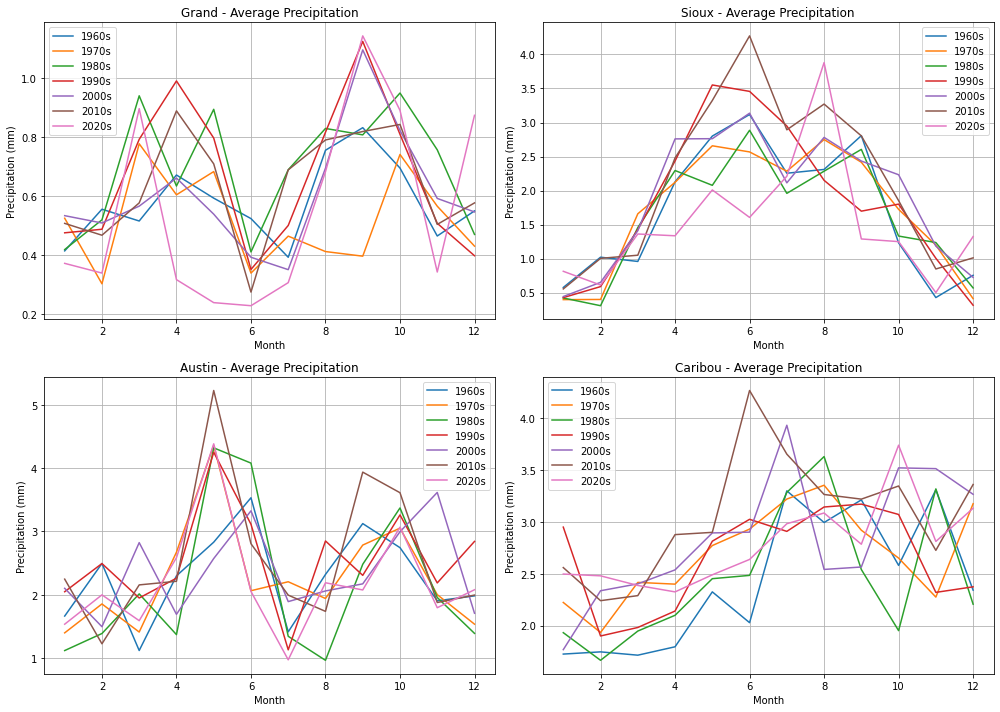

In [38]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, (file_path, station_name) in enumerate(zip(file_paths, station_names)):
    df = pd.read_csv(file_path)
    df['DATE'] = pd.to_datetime(df['DATE'])
    
    df['PRECIPITATION'] = df['PRCP'] / 10.0
    
    df['YEAR'] = df['DATE'].dt.year
    df['MONTH'] = df['DATE'].dt.month

    df = df[(df['YEAR'] >= 1960) & (df['YEAR'] <= 2023)]
    df['DECADE'] = (df['YEAR'] // 10) * 10 

    monthly_avg_precip = (
        df.groupby(['DECADE', 'MONTH'])['PRECIPITATION']
        .mean()
        .reset_index()
    )
    ax = axes[i]
    for decade in monthly_avg_precip['DECADE'].unique():
        subset = monthly_avg_precip[monthly_avg_precip['DECADE'] == decade]
        ax.plot(subset['MONTH'], subset['PRECIPITATION'], label=f"{decade}s")
    
    ax.set_title(f"{station_name} - Average Precipitation")
    ax.set_xlabel('Month')
    ax.set_ylabel('Precipitation (mm)')
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()

wind speed

C:\Users\aaa\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (17,19,21,23,25,27,29,31,33,35,37,39,41,43,45,47,49,51,53,55,57,59,61,63,65,67,69,71,73,75,77,79,81,83,85,87,89,91,93,95,97,99,101,103,105,107,109,111,113,115,117,119,121,123,125,127,129,131,133,135,137) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\aaa\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (17,19,21,23,25,27,29,31,33,35,37,39,41,43,45,47,49,51,53,55,57,59,61,63,65,67,69,71,73,75,77,79,81,83,85,87,89,91,95,111,113,115,117,119,121,123,125,127,129,131) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\aaa\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Colum

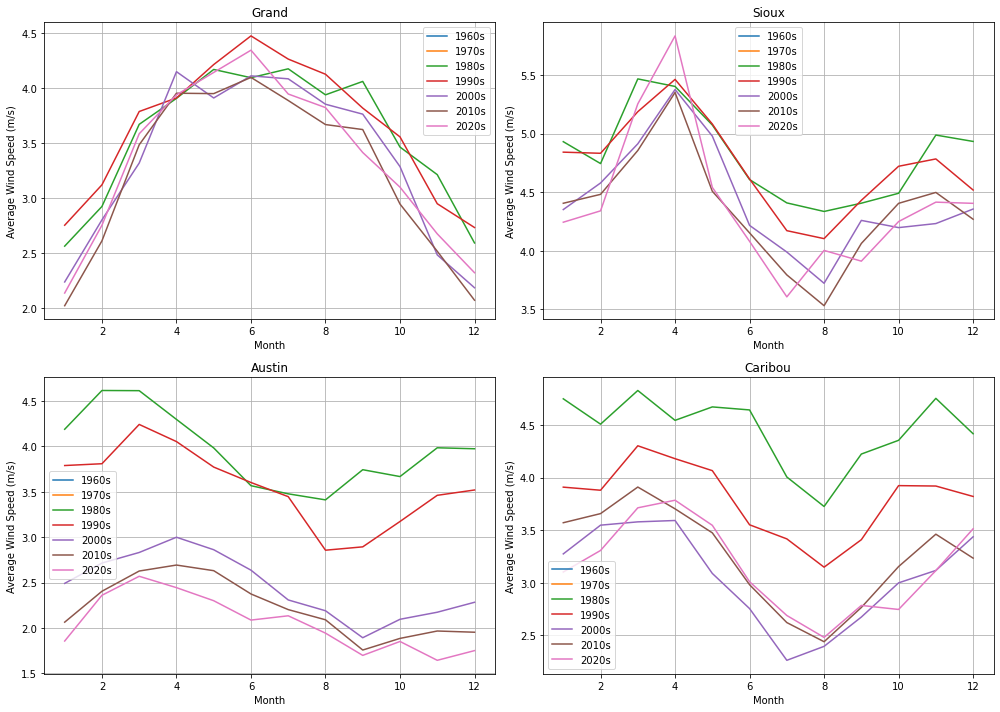

In [39]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, (file_path, station_name) in enumerate(zip(file_paths, station_names)):
    df = pd.read_csv(file_path)
    df['DATE'] = pd.to_datetime(df['DATE'])
    
    df['YEAR'] = df['DATE'].dt.year
    df['MONTH'] = df['DATE'].dt.month
    df = df[(df['YEAR'] >= 1960) & (df['YEAR'] <= 2023)]
    df['DECADE'] = (df['YEAR'] // 10) * 10

    df['AWND'] = df['AWND'] / 10.0
    
    monthly_avg_wind = (
        df.groupby(['DECADE', 'MONTH'])['AWND']
        .mean()
        .reset_index()
    )
    
    ax = axes[i]
    for decade in monthly_avg_wind['DECADE'].unique():
        subset = monthly_avg_wind[monthly_avg_wind['DECADE'] == decade]
        ax.plot(subset['MONTH'], subset['AWND'], label=f"{decade}s")
    
    ax.set_title(station_name)
    ax.set_xlabel('Month')
    ax.set_ylabel('Average Wind Speed (m/s)')
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()


special climate check

C:\Users\aaa\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (17,19,21,23,25,27,29,31,33,35,37,39,41,43,45,47,49,51,53,55,57,59,61,63,65,67,69,71,73,75,77,79,81,83,85,87,89,91,93,95,97,99,101,103,105,107,109,111,113,115,117,119,121,123,125,127,129,131,133,135,137) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\aaa\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (17,19,21,23,25,27,29,31,33,35,37,39,41,43,45,47,49,51,53,55,57,59,61,63,65,67,69,71,73,75,77,79,81,83,85,87,89,91,95,111,113,115,117,119,121,123,125,127,129,131) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\aaa\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Colum

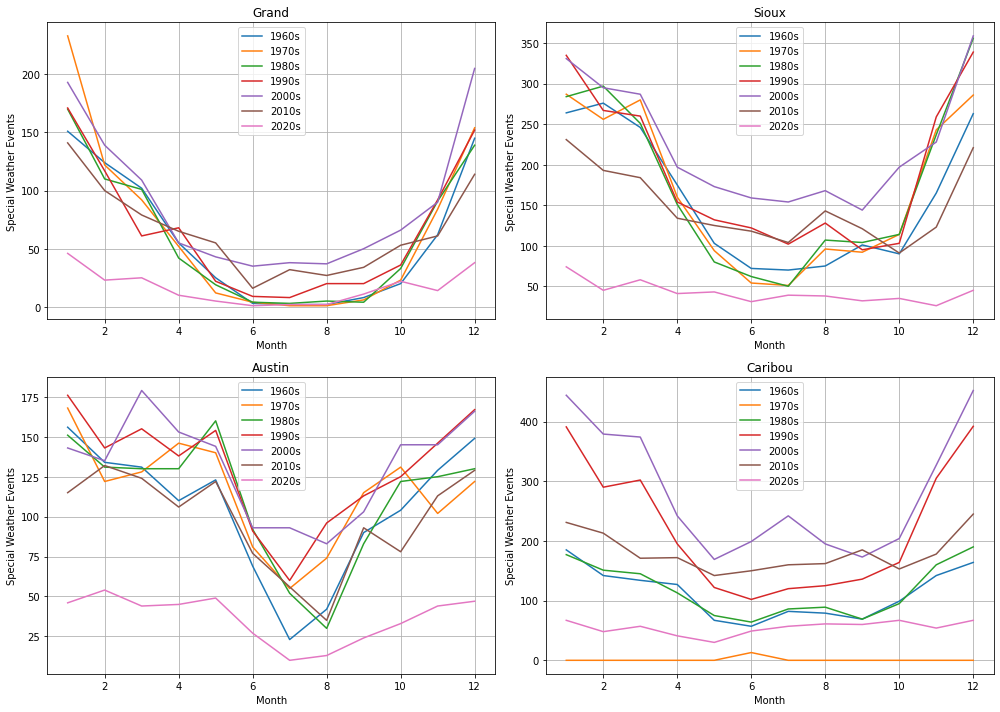

In [41]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, (file_path, station_name) in enumerate(zip(file_paths, station_names)):
    df = pd.read_csv(file_path)
    df['DATE'] = pd.to_datetime(df['DATE'])
    
    df['YEAR'] = df['DATE'].dt.year
    df['MONTH'] = df['DATE'].dt.month
    df = df[(df['YEAR'] >= 1960) & (df['YEAR'] <= 2023)]
    df['DECADE'] = (df['YEAR'] // 10) * 10

    # Identify columns starting with 'WT'
    extreme_weather = ['WT01', 'WT04', 'WT05', 'WT10', 'WT11', 'WT15', 'WT17', 'WT18']
    extreme_weather_columns = [col for col in df.columns if col in extreme_weather]

    df['SPECIAL_EVENTS'] = df[extreme_weather_columns].notnull().sum(axis=1)

    extreme_weather_counts = (
        df.groupby(['DECADE', 'MONTH'])['SPECIAL_EVENTS']
        .sum()
        .reset_index()
    )
    ax = axes[i]
    for decade in extreme_weather_counts['DECADE'].unique():
        subset = extreme_weather_counts[extreme_weather_counts['DECADE'] == decade]
        ax.plot(subset['MONTH'], subset['SPECIAL_EVENTS'], label=f"{decade}s")
    
    ax.set_title(station_name)
    ax.set_xlabel('Month')
    ax.set_ylabel('Special Weather Events')
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()


part3: relationship between migration and climate

In [85]:
# we choose Grand and Canada goose here

df = pd.read_csv("./weather_data/austin.csv")
df['DATE'] = pd.to_datetime(df['DATE'])
df['TEMPERATURE'] = (df['TMAX'] + df['TMIN']) / 20.0  
df['PRECIPITATION'] = df['PRCP'] / 10.0

df['YEAR'] = df['DATE'].dt.year
df['MONTH'] = df['DATE'].dt.month
df = df[(df['YEAR'] >= 1960) & (df['YEAR'] <= 2023)]
df['AWND'] = df['AWND'] / 10.0

df['DECADE'] = (df['YEAR'] // 10) * 10

extreme_weather = ['WT01', 'WT04', 'WT05', 'WT10', 'WT11', 'WT15', 'WT17', 'WT18']
extreme_weather_columns = [col for col in df.columns if col in extreme_weather]

df['SPECIAL_EVENTS'] = df[extreme_weather_columns].notnull().sum(axis=1)


monthly_avg_temp = df.groupby(['DECADE', 'MONTH'])['TEMPERATURE'].mean().reset_index()

monthly_avg_precip = (
        df.groupby(['DECADE', 'MONTH'])['PRECIPITATION']
        .mean()
        .reset_index()
    )
    
monthly_avg_wind = (
    df.groupby(['DECADE', 'MONTH'])['AWND']
    .mean()
    .reset_index()
)

extreme_weather_counts = (
    df.groupby(['DECADE', 'MONTH'])['SPECIAL_EVENTS']
    .sum()
    .reset_index()
)
    


C:\Users\aaa\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (17,19,21,23,25,27,29,31,33,35,37,39,41,43,45,47,49,51,53,55,57,59,61,63,65,67,69,71,73,75,77,79,81,83,85,87,89,91,93,97,107,111,113,115,117,119,121,123,125,127,129,131,133,135) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [70]:
bird_csv_path = './NABBP_2023_grp_04.csv'
cols = ['EVENT_YEAR', 'EVENT_MONTH', 'ISO_COUNTRY', 'ISO_SUBDIVISION','LAT_DD','LON_DD']

bird_df = pd.read_csv(bird_csv_path, usecols = cols)

bird_df['LAT_DD'] = pd.to_numeric(bird_df['LAT_DD'], errors='coerce')
bird_df['LON_DD'] = pd.to_numeric(bird_df['LON_DD'], errors='coerce')

bird_df['EVENT_YEAR'] = pd.to_numeric(bird_df['EVENT_YEAR'], errors='coerce')
bird_df.dropna(subset=['EVENT_YEAR'], inplace=True)  
bird_df['EVENT_YEAR'] = bird_df['EVENT_YEAR'].astype(int)

bird_df['EVENT_MONTH'] = pd.to_numeric(bird_df['EVENT_MONTH'], errors='coerce')
bird_df = bird_df[(bird_df['EVENT_MONTH'] >= 1) & (bird_df['EVENT_MONTH'] <= 12)]
bird_df['EVENT_MONTH'] = bird_df['EVENT_MONTH'].astype(int)

bird_df = bird_df.dropna(subset=['EVENT_YEAR', 'EVENT_MONTH'])
bird_df['DECADE'] = (bird_df['EVENT_YEAR'] // 10) * 10

monthly_avg_lat = bird_df.groupby(['DECADE', 'EVENT_MONTH'])['LAT_DD'].mean().reset_index()
monthly_avg_lon = bird_df.groupby(['DECADE', 'EVENT_MONTH'])['LON_DD'].mean().reset_index()

In [91]:
df['DECADE'] = df['DECADE'].astype(int)
df['MONTH'] = df['MONTH'].astype(int)
bird_df['DECADE'] = bird_df['DECADE'].astype(int)
bird_df['EVENT_MONTH'] = bird_df['EVENT_MONTH'].astype(int)

In [66]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

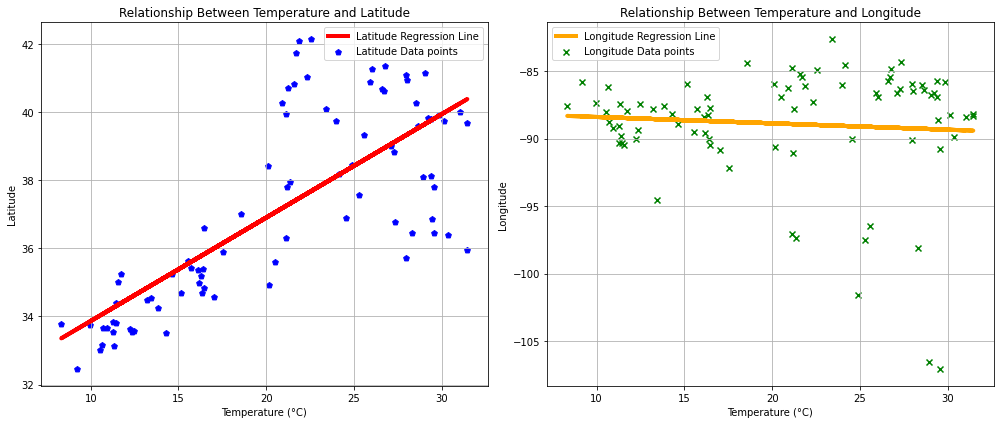

Latitude Regression Coefficient: [0.30408397]
Latitude Intercept: 30.82737351703632
Longitude Regression Coefficient: [-0.04713289]
Longitude Intercept: -87.92176319796228


In [81]:
merged_lat = pd.merge(monthly_avg_temp, monthly_avg_lat, left_on=['DECADE', 'MONTH'], right_on=['DECADE', 'EVENT_MONTH'], how='inner')

X_lat = merged_lat[['TEMPERATURE']]  
y_lat = merged_lat['LAT_DD']  

model_lat = LinearRegression()
model_lat.fit(X_lat, y_lat)

y_pred_lat = model_lat.predict(X_lat)

merged_lon = pd.merge(monthly_avg_temp, monthly_avg_lon, left_on=['DECADE', 'MONTH'], right_on=['DECADE', 'EVENT_MONTH'], how='inner')
X_lon = merged_lon[['TEMPERATURE']]
y_lon = merged_lon['LON_DD']

model_lon = LinearRegression()
model_lon.fit(X_lon, y_lon)

y_pred_lon = model_lon.predict(X_lon)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

ax1.scatter(X_lat, y_lat, label='Latitude Data points', color='blue', marker='p')
ax1.plot(X_lat, y_pred_lat, color='red', label='Latitude Regression Line', linewidth=4)
ax1.set_xlabel('Temperature (°C)')
ax1.set_ylabel('Latitude')
ax1.set_title('Relationship Between Temperature and Latitude')
ax1.legend()
ax1.grid(True)

ax2.scatter(X_lon, y_lon, label='Longitude Data points', color='green', marker='x')
ax2.plot(X_lon, y_pred_lon, color='orange', label='Longitude Regression Line', linewidth=4)
ax2.set_xlabel('Temperature (°C)')
ax2.set_ylabel('Longitude')
ax2.set_title('Relationship Between Temperature and Longitude')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

print(f'Latitude Regression Coefficient: {model_lat.coef_}')
print(f'Latitude Intercept: {model_lat.intercept_}')
print(f'Longitude Regression Coefficient: {model_lon.coef_}')
print(f'Longitude Intercept: {model_lon.intercept_}')

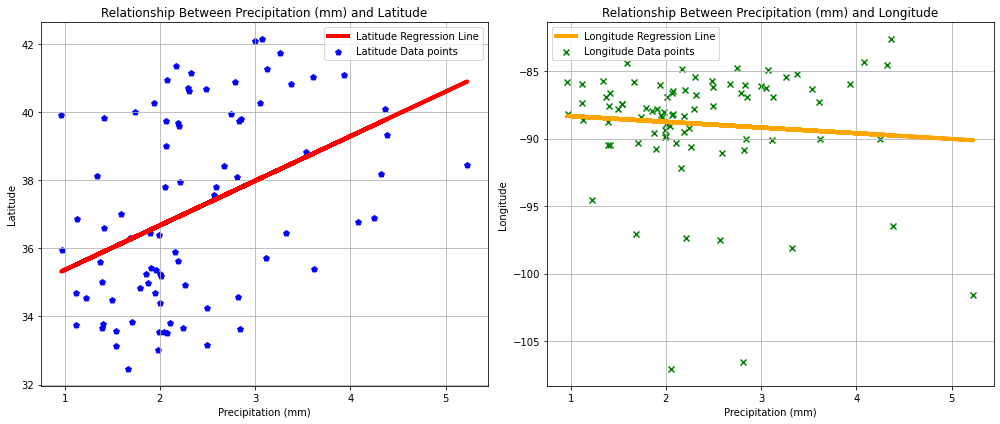

Latitude Regression Coefficient: [1.31062334]
Latitude Intercept: 34.05951903080185
Longitude Regression Coefficient: [-0.42321169]
Longitude Intercept: -87.9065927527627


In [86]:
merged_lat = pd.merge(monthly_avg_precip, monthly_avg_lat, left_on=['DECADE', 'MONTH'], right_on=['DECADE', 'EVENT_MONTH'], how='inner')

X_lat = merged_lat[['PRECIPITATION']]  
y_lat = merged_lat['LAT_DD']  

model_lat = LinearRegression()
model_lat.fit(X_lat, y_lat)

y_pred_lat = model_lat.predict(X_lat)

merged_lon = pd.merge(monthly_avg_precip, monthly_avg_lon, left_on=['DECADE', 'MONTH'], right_on=['DECADE', 'EVENT_MONTH'], how='inner')
X_lon = merged_lon[['PRECIPITATION']]
y_lon = merged_lon['LON_DD']

model_lon = LinearRegression()
model_lon.fit(X_lon, y_lon)

y_pred_lon = model_lon.predict(X_lon)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

ax1.scatter(X_lat, y_lat, label='Latitude Data points', color='blue', marker='p')
ax1.plot(X_lat, y_pred_lat, color='red', label='Latitude Regression Line', linewidth=4)
ax1.set_xlabel('Precipitation (mm)')
ax1.set_ylabel('Latitude')
ax1.set_title('Relationship Between Precipitation (mm) and Latitude')
ax1.legend()
ax1.grid(True)

ax2.scatter(X_lon, y_lon, label='Longitude Data points', color='green', marker='x')
ax2.plot(X_lon, y_pred_lon, color='orange', label='Longitude Regression Line', linewidth=4)
ax2.set_xlabel('Precipitation (mm)')
ax2.set_ylabel('Longitude')
ax2.set_title('Relationship Between Precipitation (mm) and Longitude')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

print(f'Latitude Regression Coefficient: {model_lat.coef_}')
print(f'Latitude Intercept: {model_lat.intercept_}')
print(f'Longitude Regression Coefficient: {model_lon.coef_}')
print(f'Longitude Intercept: {model_lon.intercept_}')